# Setting up the config
while the additional analysis uses the same config as the basic analysis, it uses the additional options to a greater degree, and while it is possible to modify these in the while, when working in jupyter it has to reload the kernel to detect changes in files, and thus it is also possible to edit properties of the config as you would a class object. 

This is mostly useful if swapping between samples or sample types and is demonstrated below

In [1]:
from Utils import *
config = ConfigLoader('config_subgraph_analysis.py')

#for example, swapping to the tonsil sample if it was changed to something else
config.sample_name = "tonsil"

#or swapping the image saving format
config.vizualisation_args.save_to_image_format = "png"

# Subgraph analysis
Before performing additional analysis steps, the basic analysis has to be run to generate the files required for the more extensive analytical functions.
The deeper analysis usese the same config to localt subgraphs and their reconstructions, so any changes will be seen in both.

Initializing files

Current Threshold:  1
Initializing files
Reading edgelist
Generating Subgraph object
Creating ground truth positions dataframe
check: Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn2-1500_w1\bi-umis_1_2D/full_reconstruction_summary_subgraph_1_N=93859.csv
Initializing reconstructions
self.is_modified_subgraph False
Saving Reconstruction quality metrics
check: Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn2-1500_w1\bi-umis_1_2D/reconstruction_quality_gt_subgraph_1_N=93859.csv
0.7581901034177133
0.7445576731623214
0.7995092821390756
save: Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn2-1500_w1\bi-umis_1_2D/reconstruction_quality_gt_subgraph_1_N=93859.csv
[] morph
[] base

[214.32952207232424, 214.2182806836974, 208.88401782849732] 212.477273528173
[241.28040147410573, 224.13634448823274, 234.2731135737392] 233.22995317869257
Saving Morphed reconstruction quality metrics
check: Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn

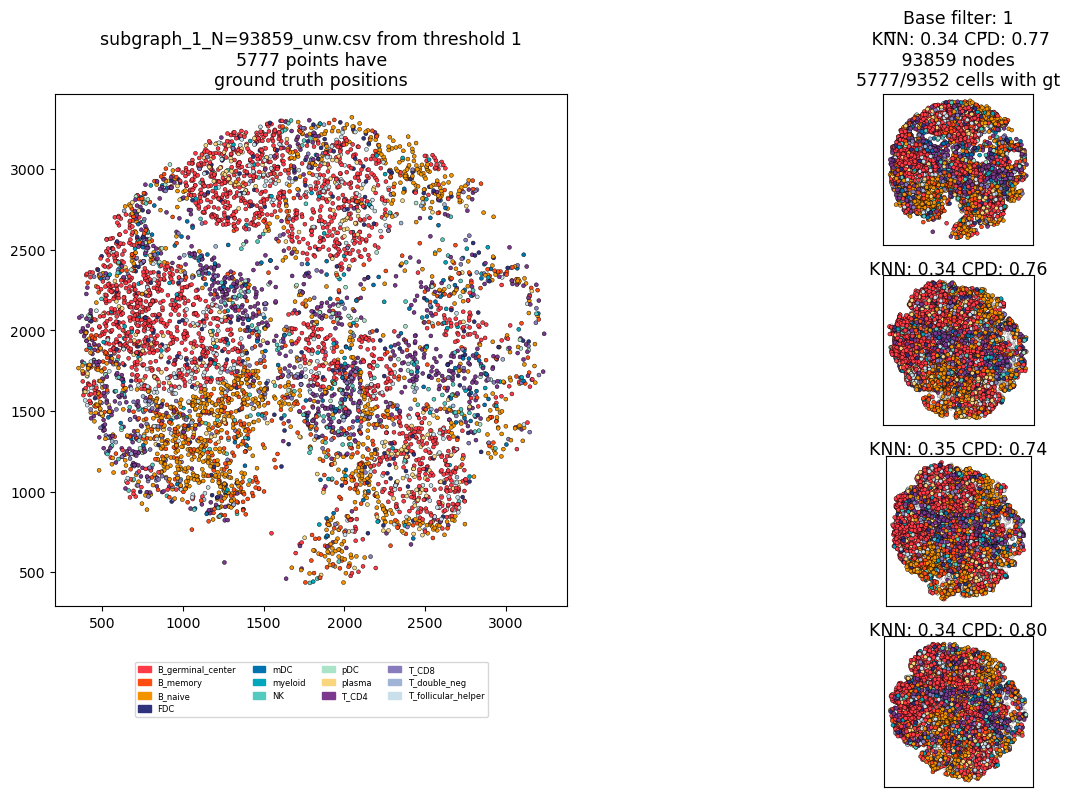

In [2]:
from subgraph_analysis_functions import perform_analysis_actions
perform_analysis_actions(config)

# Additional Subgraph analysis
After the inital analysis, there are many options available for analysis and the full list is available in the "additional_analyses.txt" document with full descriptions.

It also has two types of categories: "analyse" and "positions", where "analyse" concerns more metric analyses and will generally not show the reconstructed positions directly. and "positions" analysis will however show the reconstrcuted positions

Some of the more commonly relevant are described below: 

For the metric-type plots, the current list with descriptions are:
(* or ** indicates it needs one or two additional arguments)
```
distance_distribution       - Distribution of the mean distance per edge
knn
cpd                         - scatterplot of CPD, coloured by density
distortion
```

For the positions-type plots, the current list with descriptions are:
(* or ** indicates it needs one or two additional arguments)
```
beads*                      - Plots the bead positions of the first reconstruction, coloured by estimated bead density *Additional argument: Color by density True (default: False)
all_cells                   - Plots all cells, coloring cells without a ground truth by their estimated cell type, and cells without one in gray #not implememnted
gt_cells                    - Plots all cells with their corresponding cell type color, and cells withotut a ground truth in gray #not implememnted
new_cells                   - plots only the non-ground truth cells, with their predicted cell type if they have one #not implememnted
all_nodes                   - Plots all nodes, including beads #not implememnted
all_nodes_with_edges        - plots all nodes, with edges (can take a bit if there are a lot of edges) #not implememnted
gt_uni_edges*               - Plots the edges resulting from a unipartite projection on the cells *Additional argument: length threshold if not all edges (default: None)
```

Initializing files

Current Threshold:  1
Initializing files
Output_files\tonsil\run=all_cells_filters=numi2-1500_nconn2-1500_w1\bi-umis_1_2D
['full_reconstruction_summary_subgraph_1_N=93859.csv']
ungated
         source  target         source_bc       target_bc   source_type  \
0             1    9353  AAACCCATCATCGCAA  AAAAATGTCCAGCC      B_memory   
1            18    9353  AAACGCTGTTAAGACA  AAAAATGTCCAGCC            NK   
2            56    9353  AAAGGGCTCTCCACTG  AAAAATGTCCAGCC       B_naive   
3            94    9353  AAAGTGAAGTCATACC  AAAAATGTCCAGCC  unknown_cell   
4           184    9353  AACCTTTGTCGCGGTT  AAAAATGTCCAGCC  unknown_cell   
...         ...     ...               ...             ...           ...   
1615242    9340  388508  TTTGGTTCAAATTGCC  CTAGTACTCCTCAC  unknown_cell   
1615243    9260  388749  TTTATGCCAGATAAAC  TGGCGGCTCATACC        plasma   
1615244    9341  388749  TTTGGTTCAGCATCTA  TGGCGGCTCATACC  unknown_cell   
1615245    9280  389099  TTTCAGTCAACACACT  TA

c:\Users\simon.kolmodin\Desktop\Slide_Tag\github_publication_test\additional_subgraph_analysis.py:1227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_cells["colors"] = gt_cells["node_type"].copy().map(self.colors)
c:\Users\simon.kolmodin\Desktop\Slide_Tag\github_publication_test\additional_subgraph_analysis.py:1230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cells["colors"] = new_cells["node_type"].copy().map(self.colors)


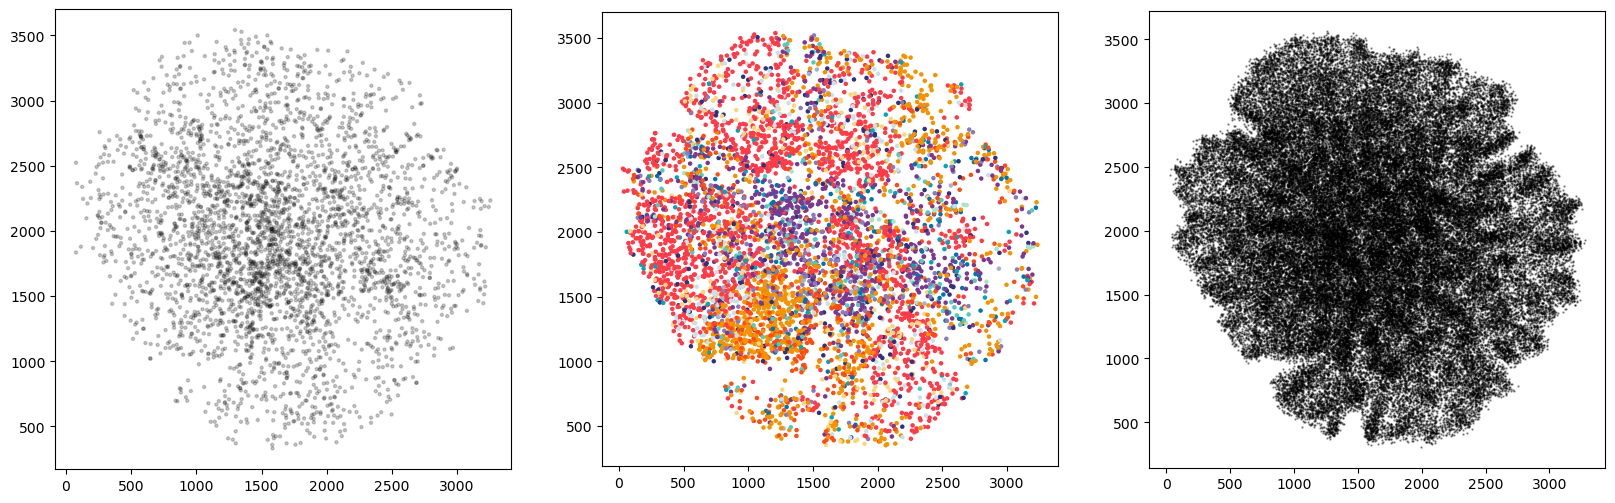

NameError: name 'quit' is not defined

In [20]:

from additional_subgraph_analysis import additional_subgraph_analysis
categories = ["positions"] # analyse or
plot_what = ["node_types"]

additional_arguments = []
for cat in categories:
    for plotting_type in plot_what:
        additional_subgraph_analysis(config, category = cat, plotting_type = plotting_type, additional_arguments = additional_arguments)
plt.show()